<a href="https://colab.research.google.com/github/chatty21/chatty21/blob/main/LFW_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
# Load LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

# Access dataset information
images = lfw_dataset.images
target_names = lfw_dataset.target_names

# Print information about the dataset
print(f"Number of samples: {len(images)}")
print(f"Number of classes: {len(target_names)}")


Number of samples: 1140
Number of classes: 5


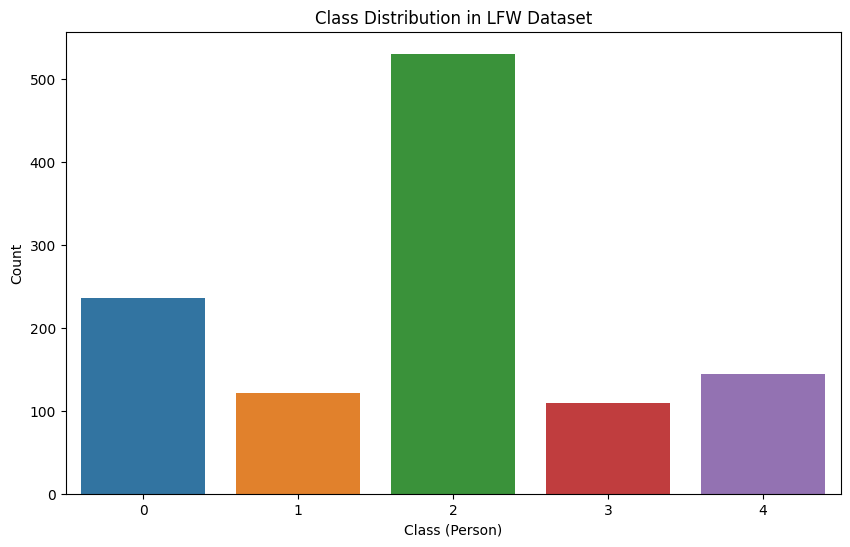

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the images and labels into a DataFrame for easier analysis
data = pd.DataFrame(lfw_dataset.data, columns=[f"pixel_{i}" for i in range(lfw_dataset.data.shape[1])])
data['target'] = lfw_dataset.target

# Display class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Class Distribution in LFW Dataset')
plt.xlabel('Class (Person)')
plt.ylabel('Count')
plt.show()

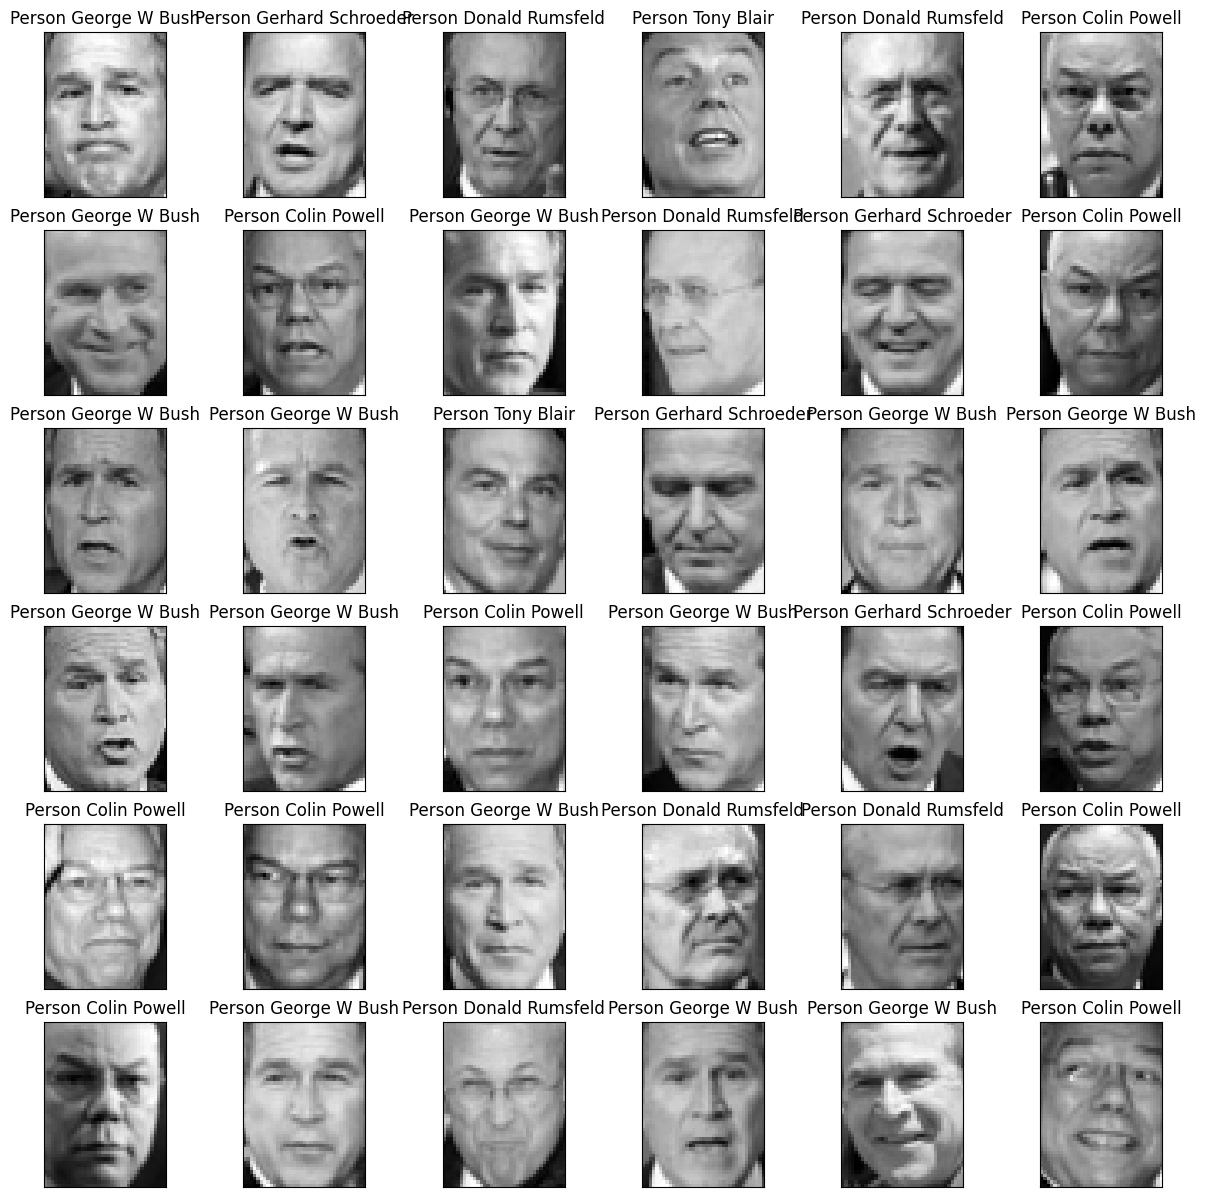

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix


# Load LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

# Access dataset information
images = lfw_dataset.images
target_names = lfw_dataset.target_names

# Informative visualizations
# Display a few images from each class
fig, axes = plt.subplots(6, 6, figsize=(15, 15), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Person {lfw_dataset.target_names[lfw_dataset.target[i]]}")


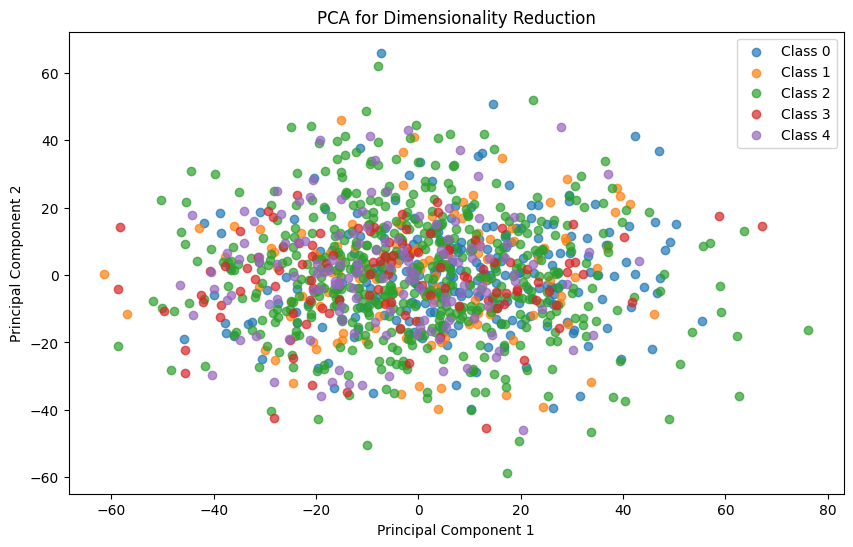

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

X = lfw_dataset.images.reshape((lfw_dataset.images.shape[0], -1))  # Flatten images
y = lfw_dataset.target

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set the desired number of components
X_pca = pca.fit_transform(X_scaled)

# Visualize the reduced-dimensional data
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y))):
    indices = np.where(y == i)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Class {i}', alpha=0.7)

plt.title('PCA for Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

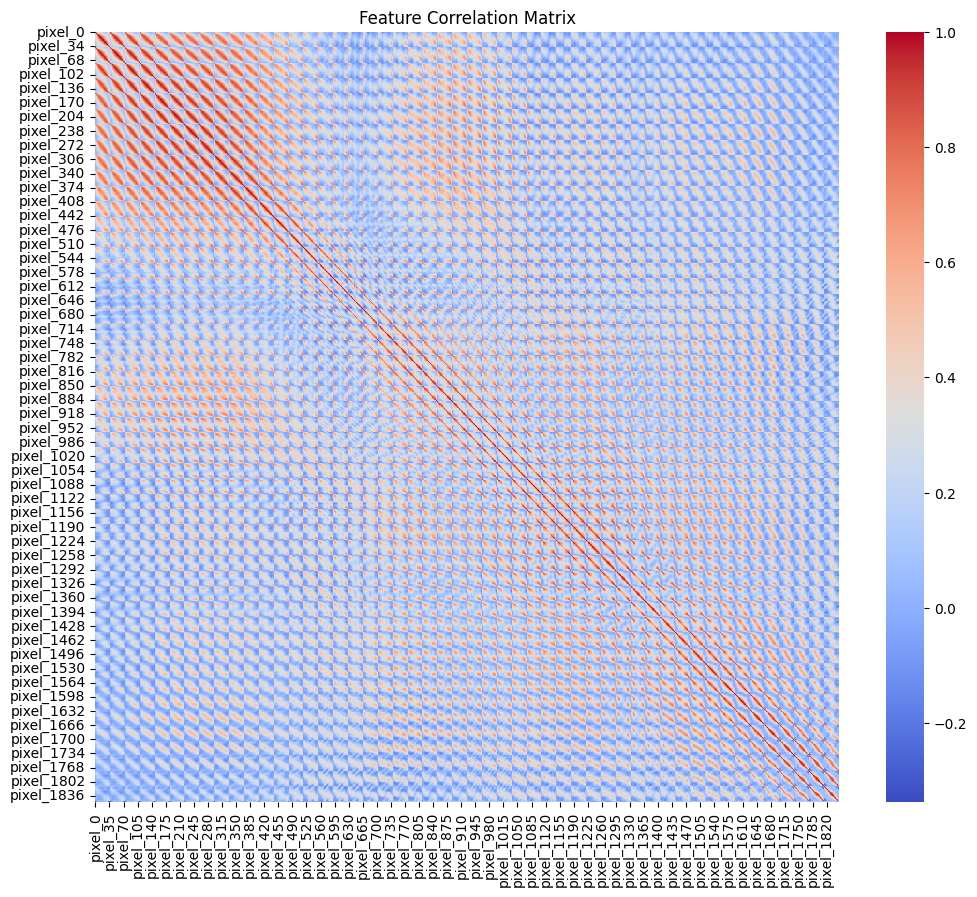

In [5]:
# Analyze feature correlations
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()


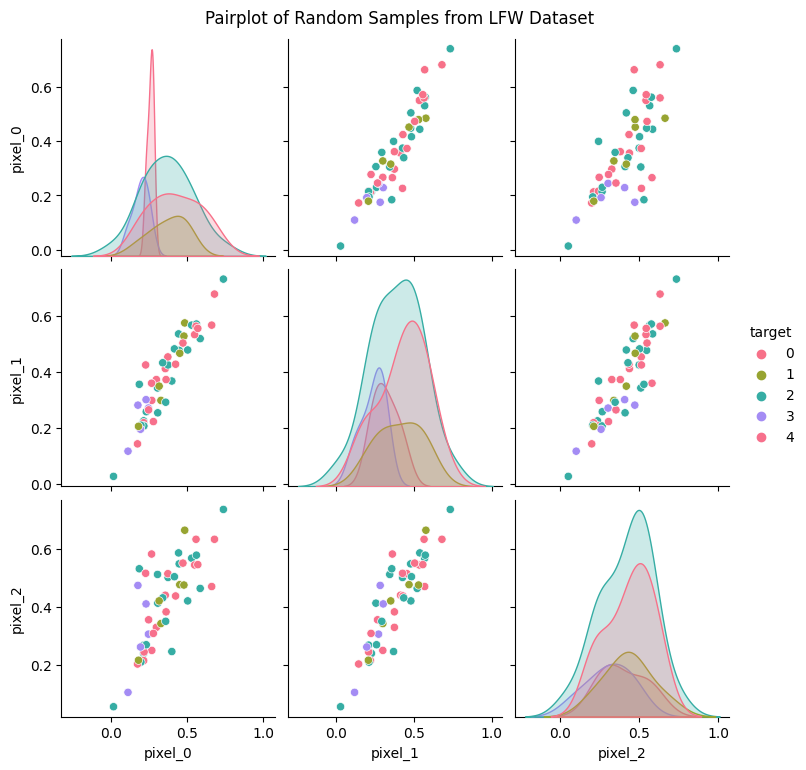

In [6]:
# Pairplot to visualize relationships between features
data = np.array(lfw_dataset.data)
data = pd.DataFrame(data, columns=[f"pixel_{i}" for i in range(data.shape[1])])
data['target'] = lfw_dataset.target
subset_data = data.sample(50)


subset_features = ['pixel_0', 'pixel_1', 'pixel_2', 'target']


sns.pairplot(subset_data[subset_features], hue='target', palette='husl')
plt.suptitle("Pairplot of Random Samples from LFW Dataset", y=1.02)
plt.show()


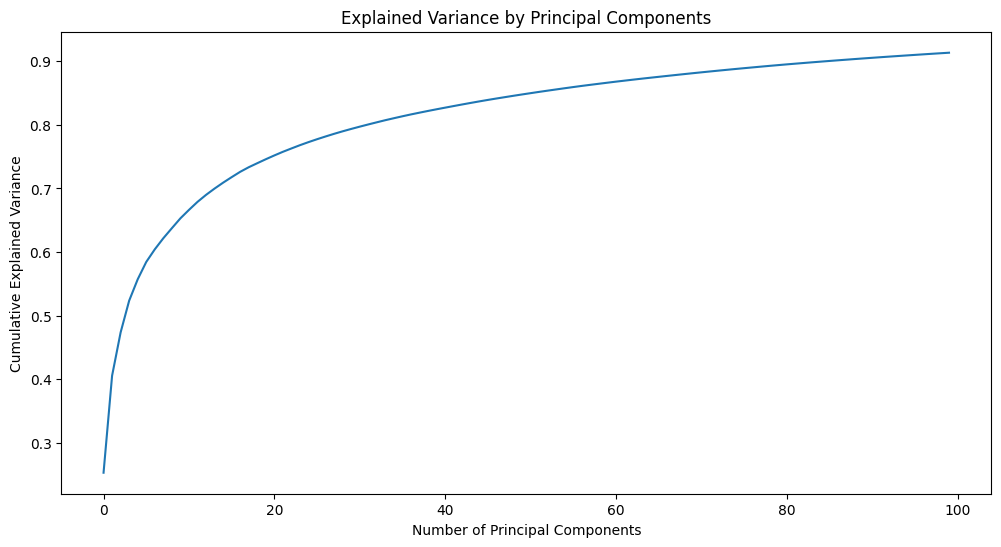

In [7]:
# Feature Engineering
# Standardize the pixel values using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('target', axis=1))

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=100)
pca_result = pca.fit_transform(scaled_data)

# Visualize explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

X = lfw_dataset.images.reshape((lfw_dataset.images.shape[0], -1))  # Flatten images
y = lfw_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lfw_dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw_dataset.images.reshape((lfw_dataset.images.shape[0], -1))  # Flatten images
y = lfw_dataset.target

In [9]:
# Gradient Descent (GD) with Regularization
sgd = SGDClassifier(alpha=0.01, max_iter=1000)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.01)

In [10]:
sgd_train_pred = sgd.predict(X_train)
sgd_test_pred = sgd.predict(X_test)

sgd_train_accuracy = accuracy_score(y_train, sgd_train_pred)
sgd_test_accuracy = accuracy_score(y_test, sgd_test_pred)

print("Accuracy:", sgd_train_accuracy)
print("Accuracy:", sgd_test_accuracy)

Accuracy: 0.9133771929824561
Accuracy: 0.8464912280701754


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [50, 100, 200],
    'penalty': ['l1', 'l2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(sgd, param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predictions on the test set using the best model
best_model = grid_search.best_estimator_
sgd_test_pred = best_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 200, 'penalty': 'l1'}


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# Calculate metrics for SVM Classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display the metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


print("\nSVM Classifier Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.8640
Precision: 0.8637
Recall: 0.8640
F1-Score: 0.8631
Confusion Matrix:
 [[44  2  3  0  1]
 [ 1 18  3  2  1]
 [ 3  1 98  2  2]
 [ 3  0  1 17  1]
 [ 1  0  3  1 20]]

SVM Classifier Metrics:
Accuracy: 0.8026
Precision: 0.8111
Recall: 0.8026
F1-Score: 0.7884
Confusion Matrix:
 [[ 42   0   8   0   0]
 [  1  14   8   2   0]
 [  2   1 102   1   0]
 [  1   0  10   7   4]
 [  0   0   7   0  18]]

Decision Tree Metrics:
Accuracy: 0.5351
Precision: 0.5477
Recall: 0.5351
F1-Score: 0.5391
Confusion Matrix:
 [[27  5  9  0  9]
 [ 4  9  8  2  2]
 [ 4 10 72 10 10]
 [ 4  4  8  5  1]
 [ 2  3 10  1  9]]

Random Forest Metrics:
Accuracy: 0.7237
Precision: 0.7701
Recall: 0.7237
F1-Score: 0.6936
Confusion Matrix:
 [[ 36   1  13   0   0]
 [  2  10  13   0   0]
 [  0   1 103   0   2]
 [  2   1  14   4   1]
 [  1   0  12   0  12]]


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.97)
pca.fit(X_train)

PCA(n_components=0.97)

In [14]:
print(pca.n_components_)

215


In [15]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Perform PCA for dimensionality reduction
n_components = 215
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate model performance after PCA

# Logistic Regression
logreg_after_pca = LogisticRegression()
logreg_after_pca.fit(X_train_pca, y_train)
y_pred_logreg_after_pca = logreg_after_pca.predict(X_test_pca)
accuracy_logreg_after_pca = accuracy_score(y_test, y_pred_logreg_after_pca)
print(f"Accuracy of Logistic Regression after PCA: {accuracy_logreg_after_pca:.4f}")

# Support Vector Machine (SVM)
svm_after_pca = SVC()
svm_after_pca.fit(X_train_pca, y_train)
y_pred_svm_after_pca = svm_after_pca.predict(X_test_pca)
accuracy_svm_after_pca = accuracy_score(y_test, y_pred_svm_after_pca)
print(f"Accuracy of SVM after PCA: {accuracy_svm_after_pca:.4f}")

# Decision Tree
dt_after_pca = DecisionTreeClassifier()
dt_after_pca.fit(X_train_pca, y_train)
y_pred_dt_after_pca = dt_after_pca.predict(X_test_pca)
accuracy_dt_after_pca = accuracy_score(y_test, y_pred_dt_after_pca)
print(f"Accuracy of Decision Tree after PCA: {accuracy_dt_after_pca:.4f}")

# Random Forest
rf_after_pca = RandomForestClassifier()
rf_after_pca.fit(X_train_pca, y_train)
y_pred_rf_after_pca = rf_after_pca.predict(X_test_pca)
accuracy_rf_after_pca = accuracy_score(y_test, y_pred_rf_after_pca)
print(f"Accuracy of Random Forest after PCA: {accuracy_rf_after_pca:.4f}")

Accuracy of Logistic Regression after PCA: 0.8860
Accuracy of SVM after PCA: 0.8114
Accuracy of Decision Tree after PCA: 0.5614
Accuracy of Random Forest after PCA: 0.5877


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train and X_test are your feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=215)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=3, resize=0.4)
X, y = lfw_dataset.data, lfw_dataset.target

# Create individual classifiers
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the individual classifiers on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions with individual classifiers
y_pred_adaboost = adaboost_clf.predict(X_test)

# Ensemble by averaging the predictions of individual classifiers
y_pred_ensemble = (y_pred_rf + y_pred_adaboost) // 2

# Evaluate individual classifiers

print("\nAdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))




AdaBoost Classifier:
Accuracy: 0.631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.50      0.60        50
           1       0.62      0.40      0.49        25
           2       0.62      0.91      0.74       106
           3       0.64      0.32      0.42        22
           4       0.50      0.24      0.32        25

    accuracy                           0.63       228
   macro avg       0.62      0.47      0.51       228
weighted avg       0.63      0.63      0.60       228

